### Python Fundamentals for Data Analysts
# Exercise 4.10 Part C: More visualizations

**Content:**
    
1. Chart 1: Total Order based on Day of the Week (Bar Chart)
2. Chart 2: Total Orders based on Hour of the Day (Histogram)
3. Chart 3: Average Spending based on Hour of the Day (Bar Chart)
4. Chart 4: Total items for each Price Range (Bar Chart)
5. Chart 5: Top Ten Departments (Bar Chart)
6. Chart 6: Customer Loyalty Level (Bar Chart)
7. Chart 7: Ordering Habits based on Loyalty Level
8. Chart 8: Ordering Habits based on Region

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime

In [5]:
# Set path to access data files
path = r'C:\Users\tsoew\OneDrive\Desktop\InstaCart Basket Analysis'

In [6]:
# Import latest version of ords_prods_combined data
print ('Start time: ' + datetime.now().strftime("%H:%M:%S"))
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'final_data.pkl'))
print ('End time: ' + datetime.now().strftime("%H:%M:%S"))

Start time: 13:29:36
End time: 13:30:19


In [7]:
df.shape

(30964564, 40)

In [8]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range', 'price_range_loc', 'busiest_day',
       'two_busiest_days', 'busiest_period', 'max_order', 'loyalty_flag',
       'avg_spend', 'spend_flag', 'median_order_day', 'freq_customer',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_join',
       'dependents', 'married', 'income', 'region', 'activity_flag',
       'income_flag', 'sum_per_order', 'profile', 'department', '_merge'],
      dtype='object')

In [9]:
df.shape

(30964564, 40)

In [10]:
# Check column frequency
df['income_flag'].value_counts()

income_flag
Medium income    21266729
Low income        5803301
High income       3894534
Name: count, dtype: int64

In [11]:
# Check column frequency
df['spend_flag'].value_counts()

spend_flag
Medium spender    20645612
High spender       8293280
Low spender        2025672
Name: count, dtype: int64

### Chart 1: Total Order based on Day of the Week (Bar Chart)

Text(0, 0.5, 'Number of orders')

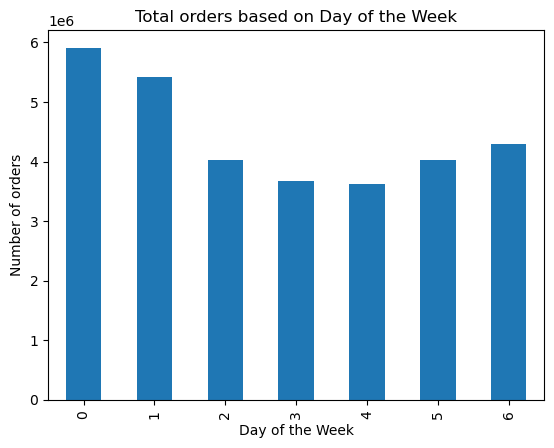

In [13]:
# Create bar chart to know total orders of each day of the week
bar_order_dow = df['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Total orders based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of orders')

### Chart 2: Total Orders based on Hour of the Day (Histogram)

Text(0, 0.5, 'Number of orders')

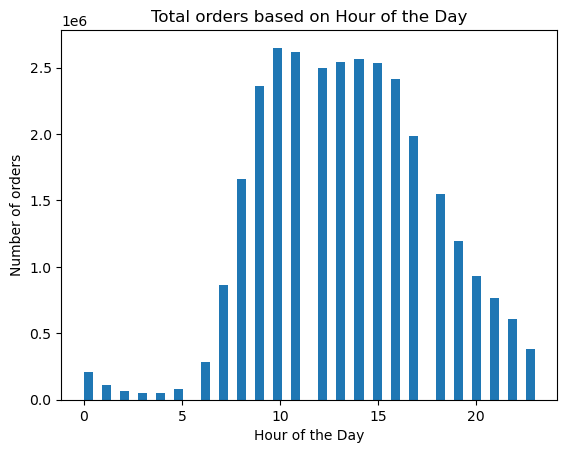

In [14]:
# Create Histogram to know total customers of each hour of the day
## bar_cust = df['order_hour_of_day'].value_counts().plot.bar()
hist_order_hod = df['order_hour_of_day'].plot.hist(bins = 50)
plt.title('Total orders based on Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of orders')

### Chart 3: Average Spending based on Hour of the Day (Bar Chart)

Text(0, 0.5, 'Average spending')

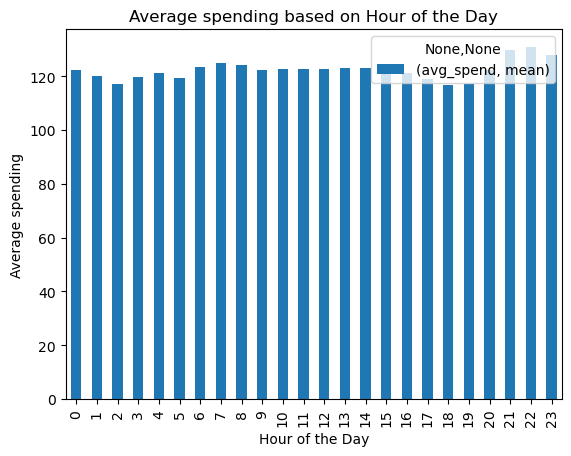

In [15]:
# Create Bar Chart to know customer spending of each hour of the day
bar_hod = df.groupby('order_hour_of_day').agg({'avg_spend': ['mean']}).plot.bar()
plt.title('Average spending based on Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average spending')

### Chart 4: Total items for each Price Range (Bar Chart)

Text(0, 0.5, 'Total items')

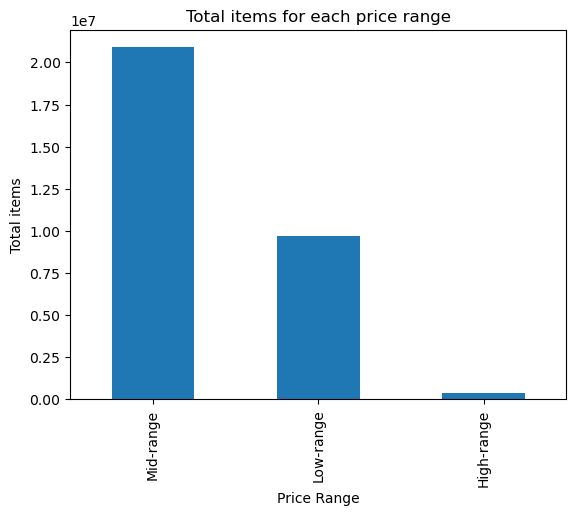

In [16]:
# Create bar chart to know total products in each price range
bar_price = df['price_range'].value_counts().plot.bar()
plt.title('Total items for each price range')
plt.xlabel('Price Range')
plt.ylabel('Total items')

In [17]:
df['price_range'].value_counts()

price_range
Mid-range     20891771
Low-range      9674840
High-range      397953
Name: count, dtype: int64

### Chart 5: Top Ten Departments (Bar Chart)

Text(0, 0.5, 'Number of items ordered')

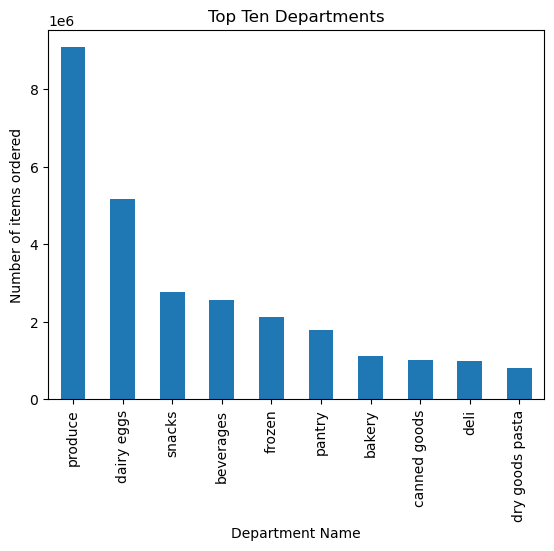

In [19]:
bar_dept = df['department'].value_counts().head(10).plot.bar()
plt.title('Top Ten Departments')
plt.xlabel('Department Name')
plt.ylabel('Number of items ordered')

In [20]:
df['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: count, dtype: int64

### Chart 6: Customer Loyalty Level (Bar Chart)

Text(0, 0.5, 'Number of customers')

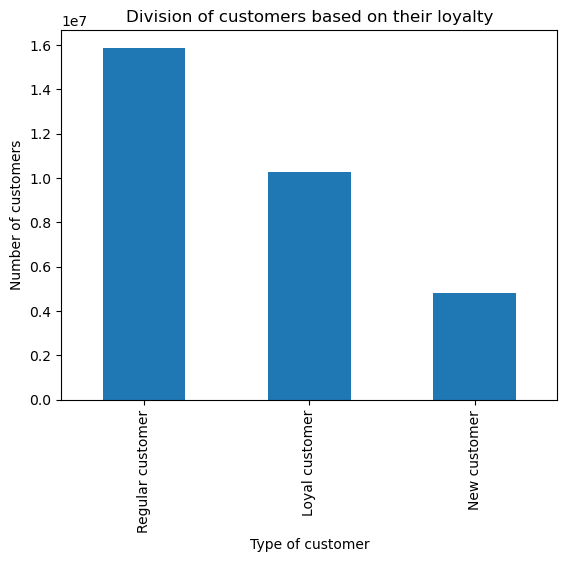

In [21]:
# Create Bar Chart for profile column
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar()
plt.title('Division of customers based on their loyalty')
plt.xlabel('Type of customer')
plt.ylabel('Number of customers')

### Chart 7: Ordering Habits based on Loyalty Level

Text(0.5, 0, 'Order Day of the week')

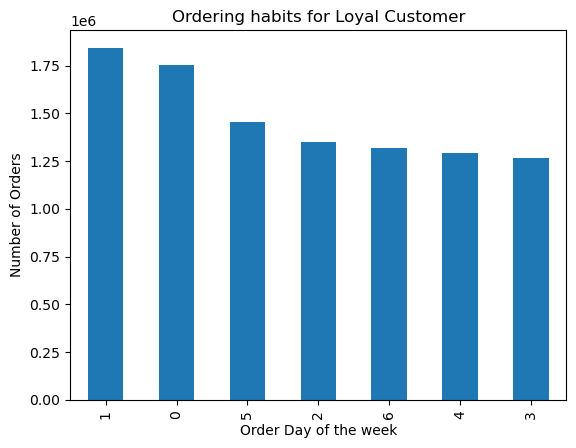

In [23]:
# Ordering habits based on loyaty flag
bar_dow_loyalty = df[df['loyalty_flag'] == 'Loyal customer']['orders_day_of_week'].value_counts().plot.bar()
plt.title('Ordering habits for Loyal Customer')
plt.ylabel('Number of Orders')
plt.xlabel('Order Day of the week')

### Chart 8: Ordering Habits based on Region

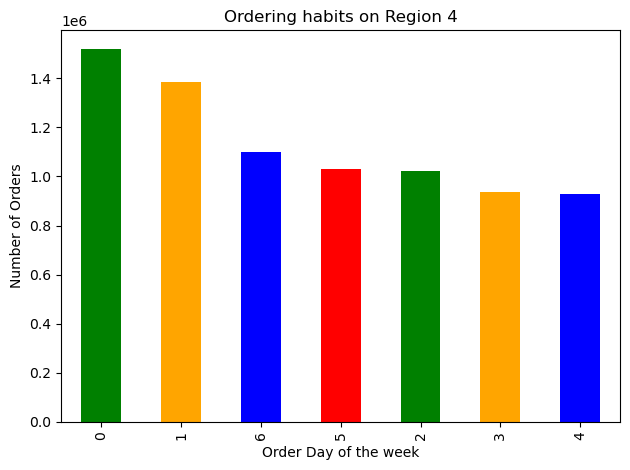

In [25]:
# Ordering habits based on region
colors = ['green', 'orange', 'blue', 'red']
bar_region = df[df['region'] == 'Region_4']['orders_day_of_week'].value_counts().plot(kind = 'bar', stacked = True, color = colors)
plt.title('Ordering habits on Region 4')
plt.ylabel('Number of Orders')
plt.xlabel('Order Day of the week')
plt.tight_layout()
plt.show()

# End